# 📉📊📈**Comparing the Performance of Various Machine Learning Models for Stock Price Prediction**📉📊📈


Stock price forecasting is a challenging topic compared to other price forecasting cases. Scholars and experts from various fields have studied stock market price forecasts, noting that stocks exhibit random walking behavior with sudden rises and falls. Accurate stock market forecasting can greatly benefit managers, investors, and decision-makers in making informed investment choices. Machine learning techniques, utilizing historical data to identify patterns and predictive models, are commonly employed for stock price prediction.

# ✅ **Bayesian Ridge Regression** ✅

Bayesian regression is a powerful method for dealing with limited or unevenly distributed data in linear regression. By incorporating probability distributions, it offers greater flexibility and adaptability in modeling uncertainty and variability. This makes Bayesian regression a robust approach for handling challenging data situations and improving the accuracy and reliability of regression models.

# **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into the Data Frame**

In [2]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

dataset = pd.read_csv('../dataset/TSLA.csv')
dataset.sample(5)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# **Data Preprocessing**

In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,0,1,-0.019243


In [4]:
#View Dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1,1,1,0.015913
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,1,1,1,0.024854
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,0,1,1,0.102962
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,1,1,1,0.015231


# **Dataset Cleaning and Null Value Testing**

In [5]:
# See how many null 
# values in each column

dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

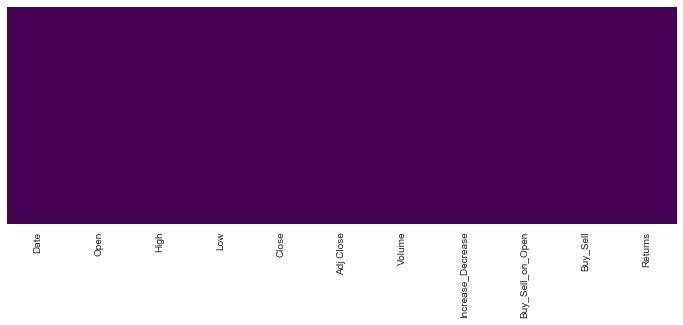

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [7]:
# see number of rows, number of columns
dataset.shape

(2415, 11)

In [8]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  26565


In [9]:
# see columns names

dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [10]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415 entries, 1 to 2415
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2415 non-null   object 
 1   Open               2415 non-null   float64
 2   High               2415 non-null   float64
 3   Low                2415 non-null   float64
 4   Close              2415 non-null   float64
 5   Adj Close          2415 non-null   float64
 6   Volume             2415 non-null   int64  
 7   Increase_Decrease  2415 non-null   int32  
 8   Buy_Sell_on_Open   2415 non-null   int32  
 9   Buy_Sell           2415 non-null   int32  
 10  Returns            2415 non-null   float64
dtypes: float64(6), int32(3), int64(1), object(1)
memory usage: 198.1+ KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

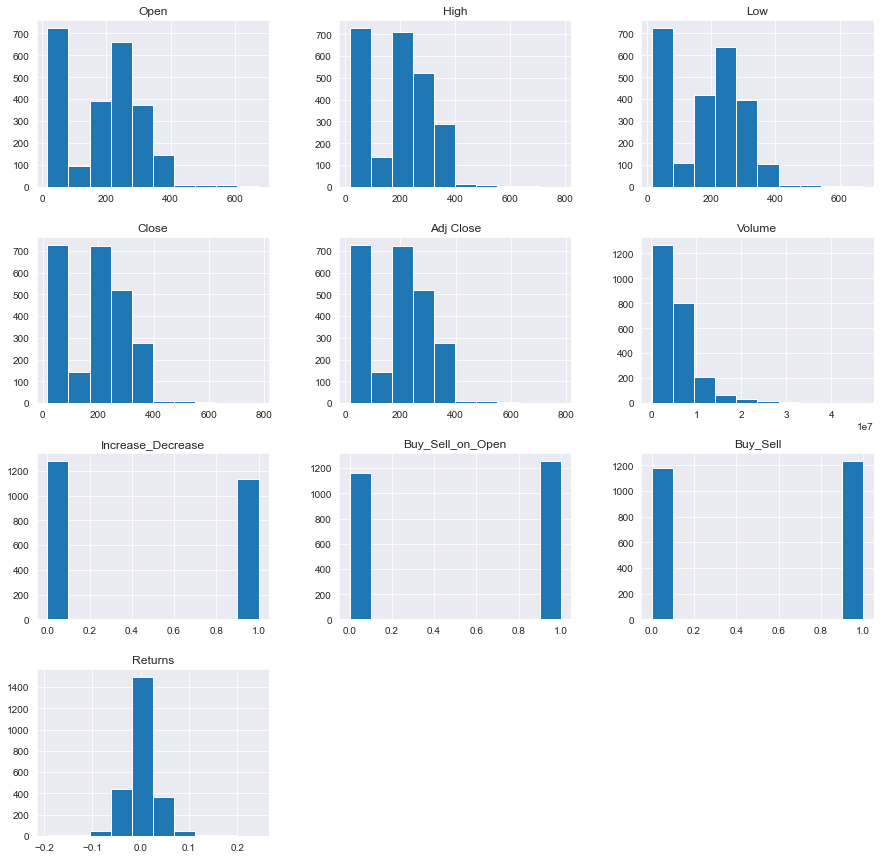

In [11]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [12]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000,2415.000000,2415.000000,2415.000000
mean,186.340410,189.646373,182.985118,186.470944,186.470944,5.567259e+06,0.469979,0.520497,0.511387,0.001975
std,118.715928,120.870941,116.833297,119.114759,119.114759,4.981607e+06,0.499201,0.499683,0.499974,0.032762
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,0.000000,0.000000,0.000000,-0.193274
25%,34.375000,34.930001,33.650000,34.400002,34.400002,1.897250e+06,0.000000,0.000000,0.000000,-0.014178
50%,213.100006,216.750000,208.919998,212.960007,212.960007,4.577200e+06,0.000000,1.000000,1.000000,0.000870
75%,266.450012,270.935012,262.104995,266.779999,266.779999,7.360250e+06,1.000000,1.000000,1.000000,0.018115
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,1.000000,1.000000,1.000000,0.243951


# **Define X and Y**

In [13]:
X = dataset['Open'].values.reshape(-1,1)
y = dataset['Adj Close'].values.reshape(-1,1)

In [14]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
model = BayesianRidge(compute_score=True)
model.fit(X, y)

BayesianRidge(compute_score=True)

In [15]:
model.coef_

array([1.00224035])

In [16]:
model.scores_

array([-13769.73117568,  -7603.6998973 ,  -7603.69989362])

# **Split Train Data and Test Data**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Dataset Traning and Model Traning**

In [20]:
model = BayesianRidge(compute_score=True)
model.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [21]:
model.coef_

array([1.00341398])

In [22]:
model.scores_

array([-11021.36016793,  -6126.72738241,  -6126.72737572])

# **Comparison of Actual Values and Predicted Values**

In [23]:
y_pred = model.predict(X_test)

# **Accuracy and Loss Function Values of the Model**

In [24]:
from sklearn import metrics
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean_Absolute_Error(MAE): 3.336363266325477
Mean_Squared_Error(MSE): 26.033929473243198
Root_Mean_Squared_Error(RMSE): 5.102345487444299


In [25]:
print('Accuracy Score:', model.score(X_test, y_test))

Accuracy Score: 0.9981252414650249
